### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt
import numpy.linalg as lin
import random
import math
import warnings
warnings.filterwarnings("ignore")


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

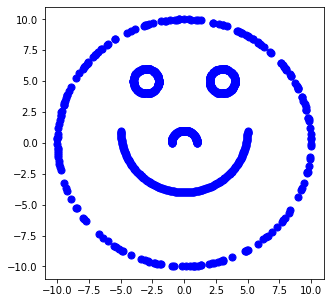

In [3]:
fig = getFigure( 5, 5 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

In [4]:
np.random.seed(0)

1.a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output.

In [5]:
#this function is used to initilise the clusters randomly , it takes two arguments namely the data X and number of cluster k
# and return the k cluster means
def initilize_cluster_center(X,K):
    n_samples = X.shape[0]     # number of rows
    n_features = X.shape[1]    # here centroids will be a k by n_features matrix of all zeros which is used to get the centroids
    centroids = np.zeros((K, n_features))     # temporary numpy array to store the centers
    
    for i in range(K):
        index = np.random.choice(n_samples)   # randomly select an index from 0 to n_samples
        random_centroid = X[index]            # here we are picking that random point from thet dataset X and puting in the 
                                              # above initilised centroids
        centroids[i] = random_centroid 

    return centroids

In [6]:
#this function takes three arguments data as X,centers as centroid and number of clusters as k
#computes which points are closer to which cluster means and return k clusters
def create_clusters(X,centroids,K):
        clusters = []
        for i in range(K): # this will be a list lf empty list with size as number of clusters
            clusters.append([])
        '''
        In the loop below we will find euclidean distance between the current point and all the already chosen cluster
        centres then we will find the minimum distance for any cluster and put the current point to that cluster
        '''
        for i, j in enumerate(X):
            sub = j-centroids
            sum_val = np.sum(sub**2, axis=1)
            euclidean_distance = np.sqrt(sum_val)
            closest_centroid_index = np.argmin(euclidean_distance)
            clusters[closest_centroid_index].append(i)

        return clusters

In [7]:
#this function takes three arguments namely the created clusters as clusters , data as X and number of clusters as K
#in this function we update the center of each cluster by taking the means of all points within the cluster and update

def calculate_centroids(clusters,X,K):
    n_features = X.shape[1]                     #number of columns
    centroids = np.zeros((K, n_features))       #here centroids will be a k by n_features matrix of all zeros
    
    for i, j in enumerate(clusters):            # enumerate gives the index i and the values j in every iteration
        new_centroids = np.mean(X[j], axis=0)   # here we will find the mean to update the cluser centers
        centroids[i] = new_centroids
    

    return centroids

In [8]:
#this function takes the final created clusters as clusters and the original data as X , takes the indices in cluster 
#and assigns the indexes so that points belong to same clusters have same id so that they can be colored accordingly 

def assign_cluster_id(clusters,X):
        n_samples = X.shape[0]            #number of rows
        y_pred = np.zeros(n_samples)      # temp numpy array to store number of zeros as number of rows 
        
        for i, j in enumerate(clusters):  #here enumerate will give indices i and values at j 
            for k in j:
                y_pred[k] = i             # here we are assigning index i to all the points within clusters

        return y_pred

In [9]:
#this function will plot the clustering output

def plot_fig(X,y,title):
        plt.title(title)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

In [10]:
#this function takes four arguments namely data as X, number of iteration as max_iter, number of clusters as K and tolerance as tol
#plots the clustering output

def Kmeans(X,max_iter,k,tol,title):
    
    #here we are initilizing k cluster means randomly 
    initial_centroids = initilize_cluster_center(X,k)
    
    for q in range(max_iter):
        
        # create clusters
        clusters = create_clusters(X, initial_centroids,k)
        
        
        # tore the current centroids for further computation
        previous_centroids = initial_centroids
        
        # here we will recompute the means to update the cluster centers        
        curr_centroids = calculate_centroids(clusters, X,k)
        
        
        # this is for checking convergence, here we are checking if the change between previous and current centroids is less 
        # than the pre defined tolerance
        
        
        check=[]# this is a boolean array to keep track of the convergence condition being met or not, first it is false
        for p in range(len(curr_centroids)):
            check.append(False)
        
        # here we check if the updates has stopped or not
        index = 0
        for i in range(len(curr_centroids)):
            first_cond = abs((previous_centroids[i][index] - curr_centroids[i][index]))<=tol
            second_cond = abs((previous_centroids[i][index+1] - curr_centroids[i][index+1]))<=tol
            
            # if the above two conditions are true we will update our boolean array to true
            if(first_cond and second_cond):
                check[i]=True
                          
        # if all the enteries of bool array check is true meaning the the algorithm has converged and we break out of the loop
        if all(check):
            print('converged at iteration number: ',q)
            break
        initial_centroids=curr_centroids
        
    y_pred = assign_cluster_id(clusters, X)
    plot_fig(X, y_pred,title)


converged at iteration number:  19


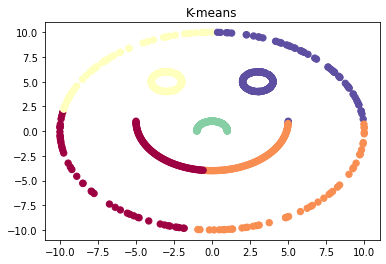

In [11]:
k = 5
tol=0.001
max_iter = 100
title = 'K-means'
Kmeans(X,max_iter,k,tol,title)

1.b) Implement k-means++ to initialize cluster centers usefully.

In [12]:
# this function will return the pairwise distance between A and B

def pairWiseDistance(A,B):
    fin = []
    index = 0
    for i in A:
        arr = []
        for j in B:
            val = (i-j)
            arr.append(np.square(val[index]) + np.square(val[index+1]))
        fin.append(arr)
    new_fin = np.array(fin)
    return new_fin

In [13]:
# this function is same as the initlization method for kMeans except here we are initilising the cluster centers meaningfully

def initilize_clusters(X,k):
    centroids = np.zeros((k, X.shape[1])) #here centroids will be a k by n_features matrix of all zeros 
    n_samples = X.shape[0]  
    
    random_index = random.randint(0, n_samples-1) # first center is chosen randomly
    centroids[0,:] = X[random_index,:]
    
    # we choose the next (k-1) centroid's to be one which is likely to be far away from all currently chosen centroids
    for j in range(1,k):
        pair_wise_distances = pairWiseDistance(X,centroids[0:j,:])
        min_distances = np.min(pair_wise_distances,axis = 1)    
        
        probability = min_distances/np.sum(min_distances)            # here we are calculating probability with which points will 
                                                                     # be selected later        
        for i in range(len(probability)):
            if probability[i] < 0:
                probability[i] = 0
                
                
        index_list = np.arange(n_samples)        
        index = np.random.choice(index_list,p = probability)         # here p = probability means the probabilities associated 
                                                                     # with each entry in index_list
        centroids[j,:] = X[index,:]
        
    return centroids      

In [14]:
#this function is similar to the above kmeans except the cluster centers initially are now initilised meaningfuly(not randomly)

def Kmeansplusplus(X,max_iter,k,tol,title):
    
    #first we will initilize k cluster means, this initilisation is different than the above k means as it selects the centers meaningfully
    initial_centroids = initilize_clusters(X,k)
    for q in range(max_iter):
        #create clusters
        clusters = create_clusters(X, initial_centroids,k)

        previous_centroids = initial_centroids
        
        #here we will recompute the means to update
        curr_centroids = calculate_centroids(clusters, X,k)
        
        
        #convergence checking
        check=[]
        index = 0
        for p in range(len(curr_centroids)):
            check.append(False)
        
        for i in range(len(curr_centroids)):
            first_cond = abs((previous_centroids[i][index] - curr_centroids[i][index]))<=tol
            second_cond = abs((previous_centroids[i][index+1] - curr_centroids[i][index+1]))<=tol
            
            if(first_cond and second_cond):
                check[i]=True
                          
        
        if all(check):
            print('converged at iteration number: ',q)
            break
        initial_centroids=curr_centroids
    
    y_pred = assign_cluster_id(clusters, X)
    plot_fig(X, y_pred,title)

converged at iteration number:  18


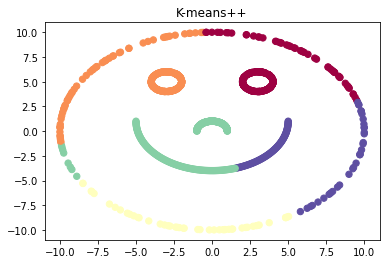

In [15]:
k = 5
title = 'K-means++'
max_iter = 100
tol=0.001
Kmeansplusplus(X,max_iter,k,tol,title)

1.c) What value of k gives you the best clustering? Are you happy with the quality of the clustering?

In [16]:
#this function is used to find the optimal number of k(number of cluster)
#here we are storing the clusters and their cluster centers which will be used later to calculate the within cluster squared error
#everthing is same as the above described k means algorithm
def evaluate_Kmeans(X,maxIter,k,tol=0.0001):
    a = []
    b = []
    #first we will initilize k cluster means 
    initial_centroids = initilize_cluster_center(X,k)
    for t in range(maxIter):   
        #create clusters
        clusters = create_clusters(X, initial_centroids,k)
        a.clear()
        a.append(clusters)
    
        
        previous_centroids = initial_centroids
        
        #here we will recompute the means to update the cluster centers        
        curr_centroids = calculate_centroids(clusters, X,k)
        b.clear()
        b.append(curr_centroids)
        
        
        check=[]
        for p in range(len(curr_centroids)):
            check.append(False)
        index = 0
        for i in range(len(curr_centroids)):
            first_cond = abs((previous_centroids[i][index] - curr_centroids[i][index]))<=tol
            second_cond = abs((previous_centroids[i][index+1] - curr_centroids[i][index+1]))<=tol
            if(first_cond and second_cond):
                check[i]=True
                          
        
        if all(check):
            break
        initial_centroids=curr_centroids
    
        
    return a,b

In [17]:
#in this function we find the distance between the all the points and their cluster center and sum them for every k to get the 
#error which will be used to plot the error vs k plot to get the elbow point
def wcss(X,maxIter,maxk):
    fin_sum = []
    index = 0
    for s in range(2,maxk,1):
        arr,brr = evaluate_Kmeans(X,10,s)
        s_some = 0
        for i in range(s):
            for a,b in X[arr[index][i]]:
                s_some+=((a-brr[index][i][index])**2 + (b-brr[index][i][index+1])**2)
        fin_sum.append(s_some)
    return fin_sum

In [18]:
maxK = 12
maxIter = 1000
evaluate = wcss(X,maxIter,maxK)

In [19]:
x_axis = []
for i in range(2,maxK,1):
    x_axis.append(i)

i ran it many time and saw that the wcss curve is steeper after k=5 so we can have optimal number of k as 5 and i think the clustering can be improved


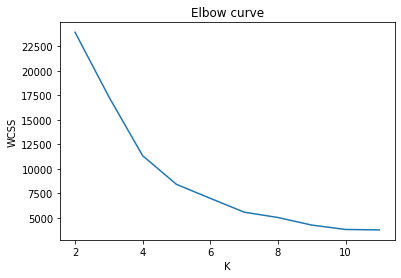

In [20]:
print('i ran it many time and saw that the wcss curve is steeper after k=5 so we can have optimal number of k as 5 and i think the clustering can be improved')
plt.plot(x_axis,evaluate)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow curve')
plt.show()

1.d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm

In [21]:
'''
this is the kernel k-means function where everything is same as above kmeans except that now we will be using the feature transformed data 
hen use that to find the indices of clusters and plot on the oridinal data provided
this function takes six arguments namely X as the tranformed input  max_iter as the maximum number of iteraions, k as the number 
of clusters,plot_X is the original untransformed data, title as the title of the plot and tol as tolerance to check for convergence
'''

def kernelKmeans(X,max_iter,k,plot_X,title,tol):
    
    #first we will initilize k cluster means 
    initial_centroids = initilize_cluster_center(X,k)
    clusters = []
    for q in range(max_iter):
        clusters = create_clusters(X, initial_centroids,k)
        previous_centroids = initial_centroids
        
        #here we will recompute the means to update the cluster centers        
        curr_centroids = calculate_centroids(clusters, X,k)
        
        #here we are checking for convergence as when the maximum element of the difference between previous and current cetroids
        # is less than tol meaning every other element will be less than tolerance which means little change in between iterations
        check = abs(previous_centroids-curr_centroids)
        if np.max(check) <= tol:
            print('converged at iteration number: ',q)
            break
        
        initial_centroids=curr_centroids
        
    #here we will take the the indices from the clusters of transformed X but plot with the original data X    
    y_pred = assign_cluster_id(clusters, X)
    plot_fig(plot_X, y_pred,title)

Below function is the gaussian kernel(RBF) and is given as<br>
$k(a,b) = exp(\frac{-||a-b||^2}{2\sigma^{2}})$ where a and b are the points and $\sigma$ is the variance

In [22]:
#returns the kernel euclidean distance between a and b
def getRbfKernel(a,b,var=3):
    diff = a-b
    index = 0
    val = (diff[index]**2 + diff[index+1]**2)/(2*var**2)
    result = np.exp(-val)
    return result

In [23]:
new_X = [] # this is the kernel matrix

In [24]:
#here we are creating the kernel matrix by mapping the original data X to higher dimension using rbf kernel
#size of the kernel matrix here will be 1000 X 1000 so what happens is that this transformation makes the data linealry separable
#after which we apply k means on that transformed data to get good clustering

for i in range(len(X)):
    temp = []
    for j in range(len(X)):
        temp.append(getRbfKernel(X[i],X[j]))
    new_X.append(temp)  

In [25]:
new_X = np.array(new_X)

converged at iteration number:  6


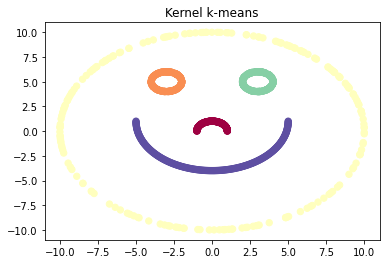

better clustering than kmeans and kmeans++


In [26]:
n_iter = 100
K=5
title = 'Kernel k-means'
tol=0.001
kernelKmeans(new_X,n_iter,k,X,title,tol)
print('better clustering than kmeans and kmeans++')